# 텍스트 생성

https://ai.google.dev/gemini-api/docs/text-generation

- venv (ml_gemini) 사용.

In [ ]:
!pip install -q google-genai python-dotenv

In [2]:
!pip install -q pillow
from PIL import Image

In [6]:
# 키 로딩
import os, dotenv
dotenv.load_dotenv()
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
# GEMINI_API_KEY # 이 출력 결과도 커밋이 되지 않도록 해야 함.

## 텍스트 입력

In [ ]:
# 기본 동작 확인하기
from google import genai

client = genai.Client(api_key=GEMINI_API_KEY)

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["How does AI work? Answer in one statement breifly."]  # 이렇게 배열 (리스트) 로 전달함.
)
print(response.text)
print(len(response.text.split()))

AI works by using algorithms to analyze data, learn patterns, and make predictions or decisions without explicit programming.



In [10]:
print(client.models.generate_content(
    model="gemini-2.0-flash",  # 동일한 client 객체에서 이렇게 모델을 바꿔서 요청할 수도 있다.
    contents=["gemini-2.0 은 flash 모델과 flash-lite 모델이 있다.", "이 둘의 장단점을 아주 짧게 요약해라."]
).text)

## Gemini 2.0 Flash vs. Flash-Lite 요약

**Flash:**

*   **장점:** 더 큰 모델, 더 강력한 성능 (복잡한 작업, 높은 정확도 요구), 더 많은 기능 지원
*   **단점:** 더 많은 리소스 (메모리, 컴퓨팅) 필요, 배포 및 실행에 더 높은 사양 요구

**Flash-Lite:**

*   **장점:** 더 가벼운 모델, 더 빠른 속도, 리소스 제약적인 환경에 적합 (모바일, IoT), 낮은 사양에서도 실행 가능
*   **단점:** Flash 모델 대비 성능 제한 (정확도, 복잡성), 기능 제한



모델에 과 API 키에 대해..
- 사용량 자체는 무제한 이지만, rate 제한이 있음.
- 각 모델 별 rate limit 보기
  - https://aistudio.google.com/plan_information

## 이미지 입력, 텍스트 생성
Gemini API는 텍스트와 미디어 파일을 결합한 멀티모달 입력을 지원합니다. 다음 예는 텍스트 및 이미지 입력에서 텍스트를 생성하는 방법을 보여줍니다.

In [32]:
!pip install -q duckduckgo_search
!pip install -q pillow

In [40]:
from duckduckgo_search import DDGS
import requests
from io import BytesIO

def search_images(keywords, max_images=3) -> list[str]:
    result = DDGS().images(keywords, max_results=max_images)
    urls = [x.get('image') for x in result]
    return urls
def download_image(url) -> Image:
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

In [43]:
urls = search_images('korea', 1)
print(urls[0])
img = download_image(urls[0])

https://fthmb.tqn.com/SEDbCCs6BRa3Qn0BTPLyKWS074Y=/3865x2576/filters:fill(auto,1)/old-fortress-gate-with-light-trails-at-downtown-455242307-58dea6143df78c5162e1ff3d.jpg


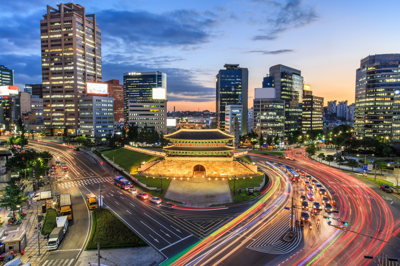

In [44]:
ratio = 400/img.size[0]
img2 = img.resize((400,int(img.height*ratio)))
img2

In [36]:
# image = Image.open("cat.jpg")
# image

In [37]:
# !pip install -U google-generativeai

In [45]:
from google import genai

client = genai.Client(api_key=GEMINI_API_KEY)

image = img2 # resized image
# print(image)

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=[image, "이 그림의 내용을 한 문장으로 서술해줘"]
)
print(response.text)

이 이미지는 네온사인과 교통 체증이 있는 현대적인 도시의 야경입니다.


아래 코드는 참고용으로만 유지. 최종 패키지에서는 에러가 발생하는, 동작하지 않는 코드이다.
```python
from google import genai
import io

client = genai.Client(api_key=GEMINI_API_KEY)
image = img2 # Image.open("cat.jpg")

# 이미지를 메모리 내 바이트 스트림으로 변환 (JPEG 형식으로 변환 예시)
# image.format을 사용하면 원본 형식 유지 가능 (JPG/PNG 등)
img_byte_arr = io.BytesIO()
image.save(img_byte_arr, format='JPEG') # 또는 image.format if not None else 'JPEG'
img_byte_arr = img_byte_arr.getvalue()

# 콘텐츠 리스트에 이미지 바이트와 텍스트를 함께 전달
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=[ # image.format이 None일 경우 기본값으로 'jpeg' 사용
        {"mime_type": f"image/{image.format.lower() if image.format else 'jpeg'}", "data": img_byte_arr},
        "Tell me about this picture"
    ]
)
# response 처리
print(response.text)
```

## 스트리밍 출력


In [11]:
from google import genai

client = genai.Client(api_key=GEMINI_API_KEY)

# 앞에서 사용한 함수와 비교: client.models.generate_content(..)
response = client.models.generate_content_stream(
    model="gemini-2.0-flash",
    contents=["3.14 파이를 문학적으로 묘사하는 시를 지어줘."]
)
# response.text 대신 chunk 를 사용한다. 응답의 끝을 표시하는 식별자가 있나?
for chunk in response:
    print(chunk.text, end="")

## 원주율, 그 영원한 춤

3.14, 점 하나 찍고 춤을 추네
원 안에서 영원히 숨 쉬는 비밀의 숫자.
둥근 세상 모든 곳에 스며든 이야기,
풀리지 않는 매혹, 신비로운 아리아.

원을 그리면 나타나는 영롱한 흔적,
끊임없이 이어지는 무한의 발자국.
정수의 틀을 벗어나 흐르는 강물처럼,
수학의 정원을 가득 채운 꽃잎처럼.

고대 이집트, 바빌론의 석판 위에서,
아르키메데스, 그 지혜로운 손길 아래,
점점 더 깊어지는 탐구의 여정 속에,
진실을 향한 갈망, 꺼지지 않는 불꽃.

컴퓨터는 밤낮으로 숫자를 세지만,
끝은 보이지 않고, 비밀은 더 깊어지네.
3.14, 그 너머에 숨겨진 우주의 언어,
무한히 펼쳐지는 상상의 날개, 영원한 노래.

그러니 경건한 마음으로 원을 그리고,
그 안에 숨겨진 파이의 이야기를 들어보렴.
수학의 아름다움, 그 황홀한 멜로디에,
잠시나마 멈춰 서서 귀 기울여 보렴.


## 멀티턴 대화

In [13]:
from google import genai

client = genai.Client(api_key=GEMINI_API_KEY)

# 참고로, 앞에서는 client.models.generate_content(..) 를 사용했었다.
chat = client.chats.create(model="gemini-2.0-flash")

response = chat.send_message("대한민국은 민주공화국이다.")
print(response.text)

response = chat.send_message("대한민국의 주인은 누구인가? 짧게 답변하라.")
print(response.text)

for message in chat.get_history():
    print(f'role - {message.role}',end=": ")
    print(message.parts[0].text)

네, 맞습니다. 대한민국 헌법 제1조 1항은 "대한민국은 민주공화국이다"라고 명시하고 있습니다. 이 조항은 대한민국의 주권이 국민에게 있고, 모든 권력이 국민으로부터 나온다는 것을 의미합니다. 또한, 대한민국이 왕이나 귀족 등 특정 계층이 아닌 국민에 의해 운영되는 공화국임을 나타냅니다.

국민

role - user: 대한민국은 민주공화국이다.
role - model: 네, 맞습니다. 대한민국 헌법 제1조 1항은 "대한민국은 민주공화국이다"라고 명시하고 있습니다. 이 조항은 대한민국의 주권이 국민에게 있고, 모든 권력이 국민으로부터 나온다는 것을 의미합니다. 또한, 대한민국이 왕이나 귀족 등 특정 계층이 아닌 국민에 의해 운영되는 공화국임을 나타냅니다.

role - user: 대한민국의 주인은 누구인가? 짧게 답변하라.
role - model: 국민



## 구성 매개변수

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["AI는 인류의 종말을 예언할 수 있는가?"],
    config=types.GenerateContentConfig(
        max_output_tokens=500,
        temperature=1.9 # 0.1
    )
)
print(response.text)

## 시스템 지침 (System instructions)

In [14]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

response = client.models.generate_content(
    model="gemini-2.0-flash",
    config=types.GenerateContentConfig(
        system_instruction="You are a cat. Your name is Neko."),
    contents="Hello there"
)
print(response.text)

Mrow! Hello hooman. Neko is here. What do you want? Do you have tuna? Or maybe you want to give me scritches? Purrrr...



------------

## 부록: 문제점 기록
먼저 이 노트북을 시작하게 된 계기가..
  - langchain을 공부 하다가, 동작 가능한 openai api key를 얻지 못함
  - gemini api key 는 무료 사용이 가능함을 확인. 그래서 gemini api 검토
발견 된 문제
  - "기존의 langchain 연습을 위해 만들어둔 가상환경" 위에 그대로 google genai 등 패키지를 pip 으로 설치
  - 이때 버전 충돌 메시지가 뜸. 이걸 그냥 무시하고 진행하다가 다음과 같은 에러 발생.
```python
response = client.models.generate_content(
  model="gemini-2.0-flash",
  contents=[image, "Tell me about this instrument"]
)
```
1차 에러
```
ClientError: 400 INVALID_ARGUMENT. {'error': {'code': 400, 'message': '* GenerateContentRequest.contents[0].parts: contents.parts must not be empty.\n', 'status': 'INVALID_ARGUMENT'}}

Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
```
1차 조치
- gemini 에 문의. 자기 회사의 api 에 대한 질문이므로 금방 쉽게 해결 될 것으로 기대했음. 하지만... 아래와 같은 1차 답변 받음
  - API 요청 시 전달된 인자(argument)가 유효하지 않다는 것을 의미한다.
  - 특히 `* GenerateContentRequest.contents[0].parts: contents.parts must not be empty.` 부분은 generate_content 메서드로 전달된 contents 리스트의 첫 번째 요소(contents[0], 즉 이미지 객체) 안에 있는 parts라는 필드가 비어있는게 문제라는 말이다.
- 해석하자면, google-generativeai 라이브러리가 API를 호출하기 전에 contents 리스트의 요소들을 내부적으로 API가 이해할 수 있는 형식(이미지의 경우 데이터 바이트 + MIME 타입으로 구성된 "Part" 객체)으로 변환하는 과정이 필요한데,
- 이 변환 과정에서 문제가 발생하여, 이미지 객체를 제대로 처리하지 못하고 이미지 데이터(bytes)가 포함되어야 할 parts 필드가 비어있는 상태로 API에 요청이 전송되었다는 말이다.
- 답변에서 가이드한 대로 좀 더 구체적으로 generate_content 호출.

1차 시도 후 다시 에러
```
ValidationError: 15 validation errors for _GenerateContentParameters
contents.list[union[Content,list[union[File,Part,str]],File,Part,str]].0.Content.mime_type
  Extra inputs are not permitted [type=extra_forbidden, input_value='image/jpeg', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/extra_forbidden
```
구글의 두번째 분석 및 답변
- 1차 에러와 2차 에러 메시지 간에 논리적 모순이 발생함. 즉, 논리적 설명이 불가.
- 여러 환경적 요인을 의심하며, 대략 3~4가지 정도 의심 포인트 나열.
- 그 중 하나가 conda 와 pip 패키지 간 불일치로 인한 미묘한 버그(?)의 가능성 언급.

- 조치 및 결론
  - 다시 처음부터 venv 로 가상환경 생성하고, 꼭 필요한 패키지만 설치한 후 재시도 -> 성공함.
  - 일단 이 노트북은 venv 단일 패키지 툴 만 사용하기로 하고 진행. 하지만 향후 이렇게 패키지 중복 상황을 피할 수 없을 경우 어떻게 할 것인지 고민거리는 남아 있음.
- 참고
  - https://gemini.google.com/app/46943c416aa40bd3